In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 다운받아줍니다.

In [2]:
batch_size=12

train_data=datasets.MNIST('D:\datasets',train=True, download=True, transform=transforms.ToTensor())
test_data=datasets.MNIST('D:\datasets',train=True, download=True, transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size)


# Layer 5

In [3]:
class Module_Layer_5(nn.Module):
    def __init__(self,hidden_units=[512,256,128,64]):
        super().__init__()
        
        self.in_dim=28*28
        self.out_dim=10
        # Using ModuleList for indicate submodule 
        self.l_layers=nn.ModuleList([nn.Linear(self.in_dim,512)])
        
        # Insert our submodule to ModuleList not just python list
        
        for i in range(len(hidden_units)-1):
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
            
        # append last submodule
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        
        # activation function
        self.relu=nn.ReLU()
        self.log_softmax=nn.LogSoftmax()
        


    def forward(self,x):
        # flatten 
        a1=self.relu(self.l_layers[0](x.view(-1, self.in_dim)))
        a2=self.relu(self.l_layers[1](a1))
        a3=self.relu(self.l_layers[2](a2))
        a4=self.relu(self.l_layers[3](a3))
        logit=self.l_layers[4](a4)
        return logit
            
model_layer_5=Module_Layer_5()
print(model_layer_5.l_layers)

ModuleList(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): Linear(in_features=64, out_features=10, bias=True)
)


# Layer 4

In [4]:
class Module_Layer_4(nn.Module):
    def __init__(self,hidden_units=[512,256,128]):
        super().__init__()
        
        self.in_dim=28*28
        self.out_dim=10
        # Using ModuleList for indicate submodule 
        self.l_layers=nn.ModuleList([nn.Linear(self.in_dim,512)])
        
        # Insert our submodule to ModuleList not just python list
        
        for i in range(len(hidden_units)-1):
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
            
        # append last submodule
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        
        # activation function
        self.relu=nn.ReLU()
        self.log_softmax=nn.LogSoftmax()
        


    def forward(self,x):
        # flatten 
        a1=self.relu(self.l_layers[0](x.view(-1, self.in_dim)))
        a2=self.relu(self.l_layers[1](a1))
        a3=self.relu(self.l_layers[2](a2))
        logit=self.l_layers[3](a3)
        return logit
            
model_layer_4=Module_Layer_4()
print(model_layer_4.l_layers)

ModuleList(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Linear(in_features=128, out_features=10, bias=True)
)


# Layer 3

In [5]:
class Module_Layer_3(nn.Module):
    def __init__(self,hidden_units=[512,256]):
        super().__init__()
        
        self.in_dim=28*28
        self.out_dim=10
        # Using ModuleList for indicate submodule 
        self.l_layers=nn.ModuleList([nn.Linear(self.in_dim,512)])
        
        # Insert our submodule to ModuleList not just python list
        
        for i in range(len(hidden_units)-1):
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
            
        # append last submodule
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        
        # activation function
        self.relu=nn.ReLU()
        self.log_softmax=nn.LogSoftmax()
        


    def forward(self,x):
        # flatten 
        a1=self.relu(self.l_layers[0](x.view(-1, self.in_dim)))
        a2=self.relu(self.l_layers[1](a1))
        logit=self.l_layers[2](a2)
        return logit
            
model_layer_3=Module_Layer_3()
print(model_layer_3.l_layers)

ModuleList(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=10, bias=True)
)


# Layer 2

In [6]:
class Module_Layer_2(nn.Module):
    def __init__(self,hidden_units=[512]):
        super().__init__()
        
        self.in_dim=28*28
        self.out_dim=10
        # Using ModuleList for indicate submodule 
        self.l_layers=nn.ModuleList([nn.Linear(self.in_dim,512)])
        
        # Insert our submodule to ModuleList not just python list
        # not necessary actually
        for i in range(len(hidden_units)-1):
            print(i)
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
            
        # append last submodule
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        
        # activation function
        self.relu=nn.ReLU()
        self.log_softmax=nn.LogSoftmax()
        


    def forward(self,x):
        # flatten 
        a1=self.relu(self.l_layers[0](x.view(-1, self.in_dim)))
        logit=self.l_layers[1](a1)
        return logit
            
model_layer_2=Module_Layer_2()
print(model_layer_2.l_layers)

ModuleList(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=10, bias=True)
)


# Train 🏄‍♂️

## Layer 5

In [7]:
# plotting preparation
# x-axis
layer=[]
# y-axis
accuracy=[]

# includes softmax !

criterion=nn.CrossEntropyLoss()


optimizer=optim.SGD(model_layer_5.parameters(),lr=0.01)


for epoch in range(10):
    running_loss=0.0
    # traning 
    for i, data in enumerate(train_loader,0):
        inputs,labels=data
       
        # set cummulated grad to zero ! 
        optimizer.zero_grad()
        # acutally forward 
        outputs=model_layer_5(inputs)
        # loss 비교
        loss=criterion(outputs,labels)
        # compute
        loss.backward()
        # update
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('finish training')

n_predict=0
n_correct=0

# test
for data in test_loader:
    inputs, labels = data
    # forward
    outputs = model_layer_5(inputs)
    _,predicted=torch.max(outputs,1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()

# x-axis
layer.append(len(model_layer_5.l_layers))
# y-axis
accuracy.append(round(int(n_correct)/int(n_predict),4))

[1,  2000] loss: 2.178
[1,  4000] loss: 0.759
[2,  2000] loss: 0.323
[2,  4000] loss: 0.232
[3,  2000] loss: 0.160
[3,  4000] loss: 0.148
[4,  2000] loss: 0.108
[4,  4000] loss: 0.107
[5,  2000] loss: 0.079
[5,  4000] loss: 0.086
[6,  2000] loss: 0.068
[6,  4000] loss: 0.062
[7,  2000] loss: 0.048
[7,  4000] loss: 0.055
[8,  2000] loss: 0.037
[8,  4000] loss: 0.044
[9,  2000] loss: 0.031
[9,  4000] loss: 0.033
[10,  2000] loss: 0.026
[10,  4000] loss: 0.026
finish training


## Layer 4

In [8]:
# includes softmax !
criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model_layer_4.parameters(),lr=0.01)


for epoch in range(10):
    running_loss=0.0
    # traning 
    for i, data in enumerate(train_loader,0):
        inputs,labels=data
       
        # set cummulated grad to zero ! 
        optimizer.zero_grad()
        # acutally forward 
        outputs=model_layer_4(inputs)
        # loss 비교
        loss=criterion(outputs,labels)
        # compute
        loss.backward()
        # update
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('finish training')

n_predict=0
n_correct=0

# test
for data in test_loader:
    inputs, labels = data
    # forward
    outputs = model_layer_4(inputs)
    _,predicted=torch.max(outputs,1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()

# x-axis
layer.append(len(model_layer_4.l_layers))
# y-axis
accuracy.append(round(int(n_correct)/int(n_predict),4))

[1,  2000] loss: 1.493
[1,  4000] loss: 0.421
[2,  2000] loss: 0.277
[2,  4000] loss: 0.226
[3,  2000] loss: 0.173
[3,  4000] loss: 0.148
[4,  2000] loss: 0.124
[4,  4000] loss: 0.110
[5,  2000] loss: 0.095
[5,  4000] loss: 0.085
[6,  2000] loss: 0.072
[6,  4000] loss: 0.073
[7,  2000] loss: 0.058
[7,  4000] loss: 0.060
[8,  2000] loss: 0.051
[8,  4000] loss: 0.047
[9,  2000] loss: 0.038
[9,  4000] loss: 0.043
[10,  2000] loss: 0.032
[10,  4000] loss: 0.036
finish training


## layer 3

In [9]:
# includes softmax !
criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model_layer_3.parameters(),lr=0.01)


for epoch in range(10):
    running_loss=0.0
    # traning 
    for i, data in enumerate(train_loader,0):
        inputs,labels=data
       
        # set cummulated grad to zero ! 
        optimizer.zero_grad()
        # acutally forward 
        outputs=model_layer_3(inputs)
        # loss 비교
        loss=criterion(outputs,labels)
        # compute
        loss.backward()
        # update
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('finish training')

n_predict=0
n_correct=0

# test
for data in test_loader:
    inputs, labels = data
    # forward
    outputs = model_layer_3(inputs)
    _,predicted=torch.max(outputs,1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()

# x-axis
layer.append(len(model_layer_3.l_layers))
# y-axis
accuracy.append(round(int(n_correct)/int(n_predict),4))

[1,  2000] loss: 1.051
[1,  4000] loss: 0.366
[2,  2000] loss: 0.274
[2,  4000] loss: 0.237
[3,  2000] loss: 0.191
[3,  4000] loss: 0.177
[4,  2000] loss: 0.148
[4,  4000] loss: 0.140
[5,  2000] loss: 0.124
[5,  4000] loss: 0.112
[6,  2000] loss: 0.088
[6,  4000] loss: 0.100
[7,  2000] loss: 0.080
[7,  4000] loss: 0.079
[8,  2000] loss: 0.068
[8,  4000] loss: 0.069
[9,  2000] loss: 0.057
[9,  4000] loss: 0.059
[10,  2000] loss: 0.050
[10,  4000] loss: 0.052
finish training


## Layer 2

In [10]:
# includes softmax !
criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model_layer_2.parameters(),lr=0.01)


for epoch in range(10):
    running_loss=0.0
    # traning 
    for i, data in enumerate(train_loader,0):
        inputs,labels=data
       
        # set cummulated grad to zero ! 
        optimizer.zero_grad()
        # acutally forward 
        outputs=model_layer_2(inputs)
        # loss 비교
        loss=criterion(outputs,labels)
        # compute
        loss.backward()
        # update
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss=0.0
            
print('finish training')

n_predict=0
n_correct=0

# test
for data in test_loader:
    inputs, labels = data
    # forward
    outputs = model_layer_2(inputs)
    _,predicted=torch.max(outputs,1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()

# x-axis
layer.append(len(model_layer_2.l_layers))
# y-axis
accuracy.append(round(int(n_correct)/int(n_predict),4))

[1,  2000] loss: 0.811
[1,  4000] loss: 0.361
[2,  2000] loss: 0.295
[2,  4000] loss: 0.268
[3,  2000] loss: 0.230
[3,  4000] loss: 0.225
[4,  2000] loss: 0.195
[4,  4000] loss: 0.184
[5,  2000] loss: 0.166
[5,  4000] loss: 0.155
[6,  2000] loss: 0.142
[6,  4000] loss: 0.136
[7,  2000] loss: 0.124
[7,  4000] loss: 0.122
[8,  2000] loss: 0.112
[8,  4000] loss: 0.108
[9,  2000] loss: 0.097
[9,  4000] loss: 0.099
[10,  2000] loss: 0.095
[10,  4000] loss: 0.089
finish training


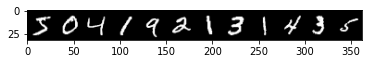

GroundTruth
     5    0    4    1    9    2    1    3    1    4    3    5
Prediction
     5    0    4    1    9    2    1    3    1    4    3    5


In [11]:
def imshow(img):
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter=iter(test_loader)
images, labels=dataiter.next()

imshow(torchvision.utils.make_grid(images,nrow=batch_size))
print('GroundTruth')
print("   "+'  '.join('%3s'%label.item() for label in labels))

# model 5 로 예측해보기
outputs=model_layer_5(images)
_, predicted=torch.max(outputs,1)
print("Prediction")
print("   "+'  '.join('%3s'%label.item() for label in predicted))

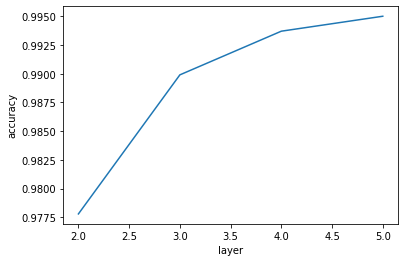

In [12]:
import matplotlib.pyplot as plt
plt.plot(layer,accuracy)
plt.xlabel('layer')
plt.ylabel('accuracy')
plt.show()


## Summary

Layer 가  증가할수록 정확도가 상승하는 결과를 얻었습니다.

감사합니다. 2016005387 박찬혁입니다.
